In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
%config IPCompleter.greedy=True


In [6]:
data = pd.read_csv("Consumer_Complaints.csv");

In [7]:
data = data[['Product', 'Consumer complaint narrative']];
data.head()

,Product,Consumer complaint narrative
0,Mortgage,NaN
1,Credit reporting,I have outdated information on my credit repor...
2,Consumer Loan,I purchased a new car on XXXX XXXX. The car de...
3,Credit card,NaN
4,Debt collection,NaN


In [8]:
data = data[pd.notnull(data['Consumer complaint narrative'])];
data.head()

,Product,Consumer complaint narrative
1,Credit reporting,I have outdated information on my credit repor...
2,Consumer Loan,I purchased a new car on XXXX XXXX. The car de...
7,Credit reporting,An account on my credit report has a mistaken ...
12,Debt collection,This company refuses to provide me verificatio...
16,Debt collection,This complaint is in regards to Square Two Fin...


In [9]:
data['Category_Id'] = data['Product'].factorize()[0];
data = data[['Product', 'Category_Id', 'Consumer complaint narrative']];
data.head()

,Product,Category_Id,Consumer complaint narrative
1,Credit reporting,0,I have outdated information on my credit repor...
2,Consumer Loan,1,I purchased a new car on XXXX XXXX. The car de...
7,Credit reporting,0,An account on my credit report has a mistaken ...
12,Debt collection,2,This company refuses to provide me verificatio...
16,Debt collection,2,This complaint is in regards to Square Two Fin...


In [10]:
data_category_and_id = data[['Product', 'Category_Id']].drop_duplicates().sort_index()
data_category_and_id

,Product,Category_Id
1,Credit reporting,0
2,Consumer Loan,1
12,Debt collection,2
25,Mortgage,3
36,Credit card,4
90,Other financial service,5
124,Bank account or service,6
152,Student loan,7
168,Money transfers,8
538,Payday loan,9


In [11]:
category_to_id = dict(data_category_and_id.values)
category_to_id

{'Bank account or service': 6,
 'Checking or savings account': 13,
 'Consumer Loan': 1,
 'Credit card': 4,
 'Credit card or prepaid card': 15,
 'Credit reporting': 0,
 'Credit reporting, credit repair services, or other personal consumer reports': 12,
 'Debt collection': 2,
 'Money transfer, virtual currency, or money service': 11,
 'Money transfers': 8,
 'Mortgage': 3,
 'Other financial service': 5,
 'Payday loan': 9,
 'Payday loan, title loan, or personal loan': 17,
 'Prepaid card': 10,
 'Student loan': 7,
 'Vehicle loan or lease': 14,
 'Virtual currency': 16}

In [12]:
id_to_category = dict(data_category_and_id[['Category_Id', 'Product']].values)
id_to_category

{0: 'Credit reporting',
 1: 'Consumer Loan',
 2: 'Debt collection',
 3: 'Mortgage',
 4: 'Credit card',
 5: 'Other financial service',
 6: 'Bank account or service',
 7: 'Student loan',
 8: 'Money transfers',
 9: 'Payday loan',
 10: 'Prepaid card',
 11: 'Money transfer, virtual currency, or money service',
 12: 'Credit reporting, credit repair services, or other personal consumer reports',
 13: 'Checking or savings account',
 14: 'Vehicle loan or lease',
 15: 'Credit card or prepaid card',
 16: 'Virtual currency',
 17: 'Payday loan, title loan, or personal loan'}

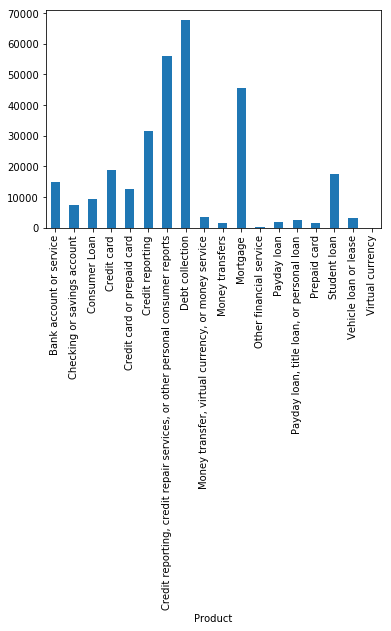

In [26]:
data.groupby('Product')['Consumer complaint narrative'].count().plot.bar();
plt.show();